In [8]:
# 教師データの生成
# numpyでy = a*exp(x) + bをつくる
import numpy as np
x = np.linspace(-10, 10, 100).reshape(-1,1)

In [9]:
x


array([[-10.        ],
       [ -9.7979798 ],
       [ -9.5959596 ],
       [ -9.39393939],
       [ -9.19191919],
       [ -8.98989899],
       [ -8.78787879],
       [ -8.58585859],
       [ -8.38383838],
       [ -8.18181818],
       [ -7.97979798],
       [ -7.77777778],
       [ -7.57575758],
       [ -7.37373737],
       [ -7.17171717],
       [ -6.96969697],
       [ -6.76767677],
       [ -6.56565657],
       [ -6.36363636],
       [ -6.16161616],
       [ -5.95959596],
       [ -5.75757576],
       [ -5.55555556],
       [ -5.35353535],
       [ -5.15151515],
       [ -4.94949495],
       [ -4.74747475],
       [ -4.54545455],
       [ -4.34343434],
       [ -4.14141414],
       [ -3.93939394],
       [ -3.73737374],
       [ -3.53535354],
       [ -3.33333333],
       [ -3.13131313],
       [ -2.92929293],
       [ -2.72727273],
       [ -2.52525253],
       [ -2.32323232],
       [ -2.12121212],
       [ -1.91919192],
       [ -1.71717172],
       [ -1.51515152],
       [ -1

In [10]:
a = 5
b = 10
y = a*np.exp(x) + b

In [11]:
y

array([[1.00002270e+01],
       [1.00002778e+01],
       [1.00003400e+01],
       [1.00004161e+01],
       [1.00005093e+01],
       [1.00006233e+01],
       [1.00007629e+01],
       [1.00009336e+01],
       [1.00011427e+01],
       [1.00013985e+01],
       [1.00017115e+01],
       [1.00020947e+01],
       [1.00025637e+01],
       [1.00031376e+01],
       [1.00038400e+01],
       [1.00046997e+01],
       [1.00057518e+01],
       [1.00070395e+01],
       [1.00086154e+01],
       [1.00105442e+01],
       [1.00129048e+01],
       [1.00157938e+01],
       [1.00193296e+01],
       [1.00236570e+01],
       [1.00289531e+01],
       [1.00354349e+01],
       [1.00433679e+01],
       [1.00530767e+01],
       [1.00649592e+01],
       [1.00795018e+01],
       [1.00973000e+01],
       [1.01190828e+01],
       [1.01457423e+01],
       [1.01783700e+01],
       [1.02183021e+01],
       [1.02671740e+01],
       [1.03269870e+01],
       [1.04001905e+01],
       [1.04897822e+01],
       [1.05994311e+01],


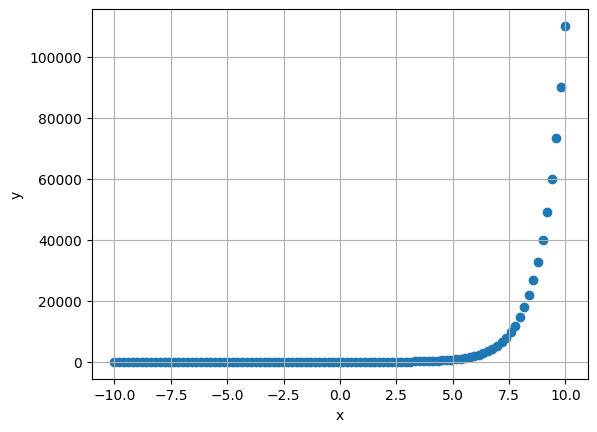

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure() #figureを初期化
ax = fig.add_subplot(111) #figureにプロットを追加
ax.scatter(x, y) # プロットに散布図を追加
ax.set_xlabel("x") #X軸ラベルを追加
ax.set_ylabel("y") #Y軸ラベルを追加
ax.grid(True) #グリッドを追加

In [13]:
!pip install pysr

In [14]:
from pysr import PySRRegressor

model = PySRRegressor(
    niterations=5,  # < Increase me for better results
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
        # ^ Custom operator (julia syntax)
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)
)

Detected Jupyter notebook. Loading juliacall extension. Set `PYSR_AUTOLOAD_EXTENSIONS=no` to disable.


In [15]:
model.fit(x, y)

/usr/local/lib/python3.10/dist-packages/pysr/sr.py:1302: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Compiling Julia backend...


[ Info: Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                            exp(x0)   
	1        7.384394                                 exp(x0) * 5.000827   
	2        3.966580                    10.139299 + exp(x0 + 1.6094296)   
	3        0.041278       (exp(x0) * inv(exp(-1.6094332))) + 10.177771   
	4        0.973137  2.092652 + ((exp(x0) + 1.6024703) * exp(1.6094...   
	5  >>>>  2.095645  (exp(x0) * 5.000001) + exp(-2.5893767 * cos(ex...   
	
	           loss  complexity  
	0  2.336417e+08           2  
	1  9.006308e+01           4  
	2  3.230126e-02           6  
	3  2.974169e-02           8  
	4  1.123925e-02           9  
	5  2.091008e-05          12  
]

In [17]:
type(model.equations_)

pandas.core.frame.DataFrame

In [20]:
model.equations_

,complexity,loss,score,equation,sympy_format,lambda_format
0,2,2.336417e+08,0.000000,exp(x0),exp(x0),PySRFunction(X=>exp(x0))
1,4,9.006308e+01,7.384394,exp(x0) * 5.000827,5.000827*exp(x0),PySRFunction(X=>5.000827*exp(x0))
2,6,3.230126e-02,3.966580,10.139299 + exp(x0 + 1.6094296),4.99995843800224*exp(x0) + 10.139299,PySRFunction(X=>4.99995843800224*exp(x0) + 10....
3,8,2.974169e-02,0.041278,(exp(x0) * inv(exp(-1.6094332))) + 10.177771,4.99997643788502*exp(x0) + 10.177771,PySRFunction(X=>4.99997643788502*exp(x0) + 10....
4,9,1.123925e-02,0.973137,2.092652 + ((exp(x0) + 1.6024703) * exp(1.6094...,4.99998293785861*exp(x0) + 10.1049761584252,PySRFunction(X=>4.99998293785861*exp(x0) + 10....
5,12,2.091008e-05,2.095645,(exp(x0) * 5.000001) + exp(-2.5893767 * cos(ex...,5.000001*exp(x0) + 10.0003972447388,PySRFunction(X=>5.000001*exp(x0) + 10.00039724...


In [21]:
model.equations_["equation"]

0                                              exp(x0)
1                                   exp(x0) * 5.000827
2                      10.139299 + exp(x0 + 1.6094296)
3         (exp(x0) * inv(exp(-1.6094332))) + 10.177771
4    2.092652 + ((exp(x0) + 1.6024703) * exp(1.6094...
5    (exp(x0) * 5.000001) + exp(-2.5893767 * cos(ex...
Name: equation, dtype: object

In [27]:
y_pred = model.predict(x, 0)

Text(0.5, 1.0, 'exp(x0)')

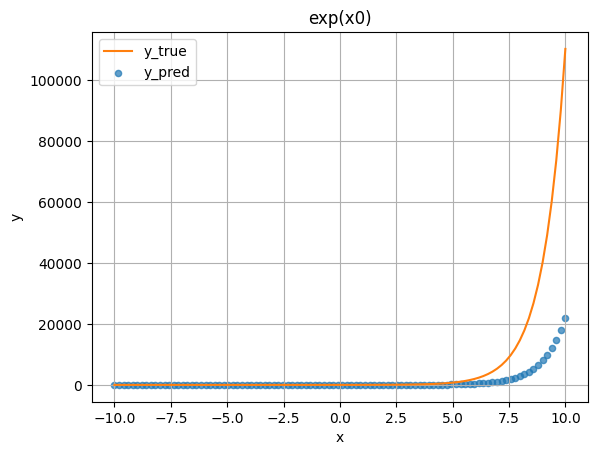

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, label="y_true", color="tab:orange")
ax.scatter(x, y_pred, label="y_pred", c="tab:blue", s=20, alpha=0.7)
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid(True)
ax.set_title(model.equations_["equation"][0])

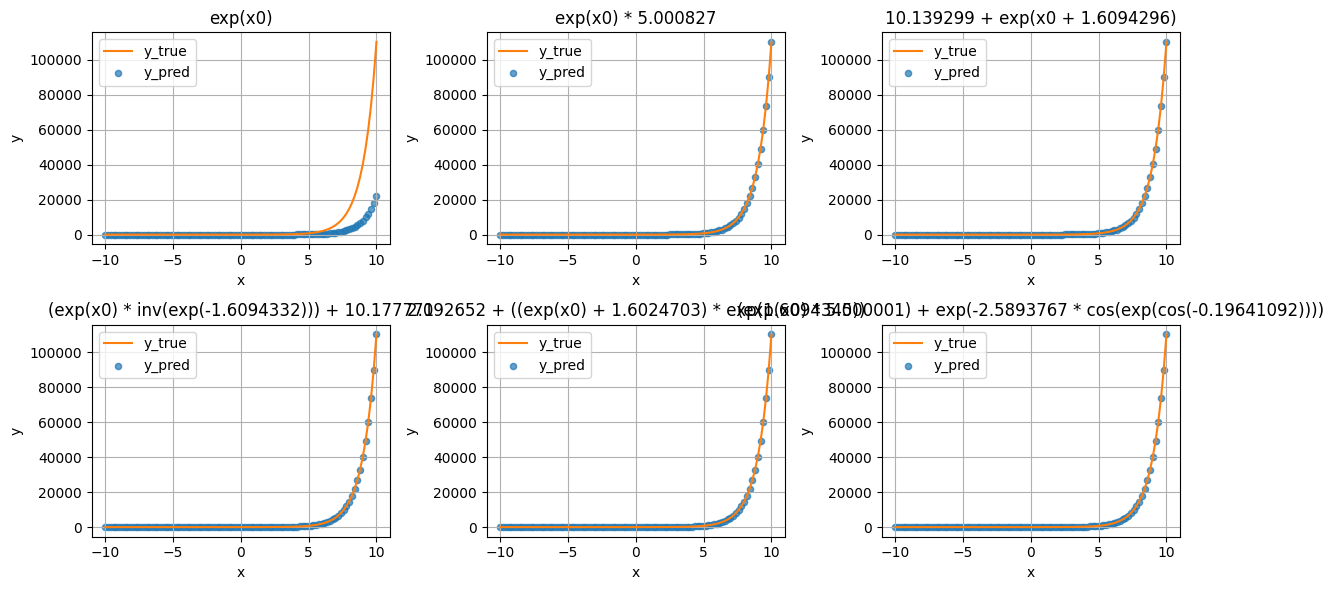

In [34]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
for i in range(len(model.equations_["equation"])):
  ax = fig.add_subplot(2, 3, i+1)
  y_pred = model.predict(x, i)
  ax.plot(x, y, label="y_true", color="tab:orange")
  ax.scatter(x, y_pred, label="y_pred", c="tab:blue", s=20, alpha=0.7)
  ax.legend()
  ax.set_xlabel("x")
  ax.set_ylabel("y")
  ax.grid(True)
  ax.set_title(model.equations_["equation"][i])
plt.tight_layout()

In [ ]:
10.13 + exp(x+1.609) = 10.13 + exp(x)*e(1.609)

In [35]:
np.exp(1.609)

4.997810917177775

In [36]:
x = np.linspace(-10, 10, 100).reshape(-1,1)

In [46]:
a = 1e-1
b = 10
c = 0.4
y = a*np.exp(c*x) + b

[-3.08383708e-01  3.39940461e-02 -5.11004943e-01  6.21479431e-01
 -4.70521029e-01 -1.52000424e+00 -2.41621762e-01  1.01035673e+00
  6.27228145e-01  1.21630447e+00 -7.56521541e-01 -7.52445215e-01
 -1.43320785e-01  5.06151174e-01  6.72887235e-02 -2.97685004e-01
  9.94560664e-01 -3.46940391e-01  3.36998791e-01  2.52188653e-01
  8.67802440e-01  1.45178660e-01  9.33781034e-01  8.39910370e-01
  3.03894565e-01 -9.82154242e-01  1.46355667e+00 -2.70969922e+00
 -1.54433535e+00  1.09415717e+00  1.38874400e+00 -1.76499610e+00
  9.18909921e-01  1.68625730e-01 -2.78486676e-01 -5.55157559e-01
  1.35018674e+00 -5.06316820e-01  1.25597658e-01 -2.00877695e-01
 -1.01040646e+00  1.43841524e+00 -8.95890636e-01  6.13543648e-01
 -1.57701408e+00 -1.01353932e+00  5.22363439e-01 -2.29672741e-02
 -5.98934292e-01  1.75523238e-01 -1.79613900e+00  3.98993676e-01
  5.03917836e-01  1.74350792e-01  1.23920236e+00 -3.97495501e-01
  2.53785844e-03 -1.12867058e+00 -1.06101495e+00 -1.48879841e-01
  5.47430264e-01  2.22873

(array([ 4.,  7.,  8., 21., 22., 17., 11.,  7.,  1.,  2.]),
 array([-2.19242701, -1.68971692, -1.18700682, -0.68429672, -0.18158662,
         0.32112348,  0.82383358,  1.32654367,  1.82925377,  2.33196387,
         2.83467397]),
 <BarContainer object of 10 artists>)

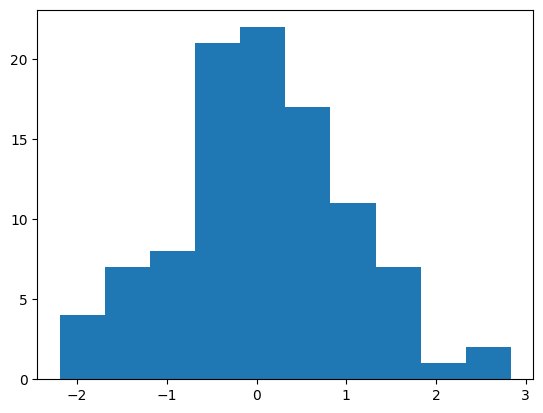

In [45]:
rng = np.random.default_rng()
print(rng.standard_normal(100))
plt.hist(rng.standard_normal(100))

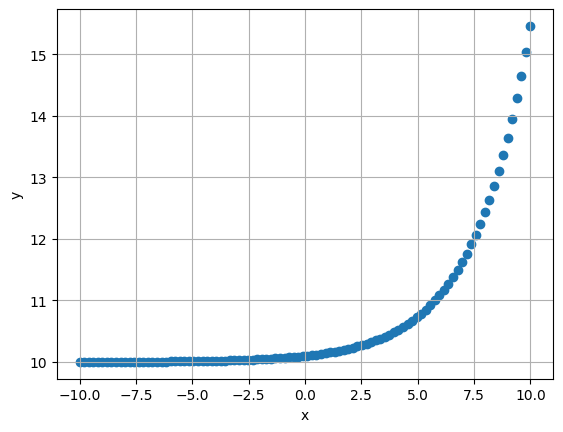

In [42]:
fig = plt.figure() #figureを初期化
ax = fig.add_subplot(111) #figureにプロットを追加
ax.scatter(x, y) # プロットに散布図を追加
ax.set_xlabel("x") #X軸ラベルを追加
ax.set_ylabel("y") #Y軸ラベルを追加
ax.grid(True) #グリッドを追加

In [47]:
len(y)

100

In [50]:
noise = rng.standard_normal(len(y)).reshape(-1,1)


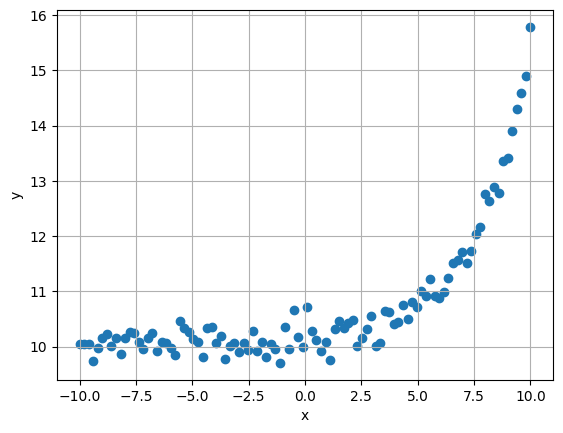

In [52]:
fig = plt.figure() #figureを初期化
ax = fig.add_subplot(111) #figureにプロットを追加
ax.scatter(x, y+noise*0.2) # プロットに散布図を追加
ax.set_xlabel("x") #X軸ラベルを追加
ax.set_ylabel("y") #Y軸ラベルを追加
ax.grid(True) #グリッドを追加

In [53]:
y_with_noise = y + 0.2*noise

In [54]:
from pysr import PySRRegressor

model = PySRRegressor(
    niterations=5,  # < Increase me for better results
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
        # ^ Custom operator (julia syntax)
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)
)

In [55]:
model.fit(x, y_with_noise)

/usr/local/lib/python3.10/dist-packages/pysr/sr.py:1302: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                      exp(2.326119)   
	1         0.154880                             11.889284 + -1.1528986   
	2         0.375778                      (0.15174389 * x0) + 10.736389   
	3         0.878682                     exp(0.15174368 * x0) + 9.41104   
	4         0.002476                9.41104 + exp(sin(0.15174368) * x0)   
	5         0.093798  exp(0.17057681 * (x0 + sin(-1.5629557))) + 9.4...   
	6         0.006133  exp(0.17057681 * (x0 + (-1.5629557 + 0.5221894...   
	7         0.011389  exp((x0 + inv(sin(sin(-1.5629557)))) * 0.17057...   
	8   >>>>  1.559464  exp(exp(sin(cos(-0.14831641)))) + (0.15164526 ...   
	9         0.000962  (exp(0.3510119 * x0) * sin(0.15164526)) + exp(...   
	10        0.007887  (exp(0.3510119 * x0) * 0.15164526) + exp(exp(s...   
	11        0.002012  (exp(0.3510119 * x0) * 0.15164526) + exp(exp(s...   
	
	        loss  complexity  
	0   1.730270           2  
	1   1.482008           3  
	2   0.698962           5  
	3   0.290300           6  
	4   0.289582           7  
	5   0.240049           9  
	6   0.238581          10  
	7   0.235879          11  
	8   0.049593          12  
	9   0.049546          13  
	10  0.048387          16  
	11  0.048290          17  
]

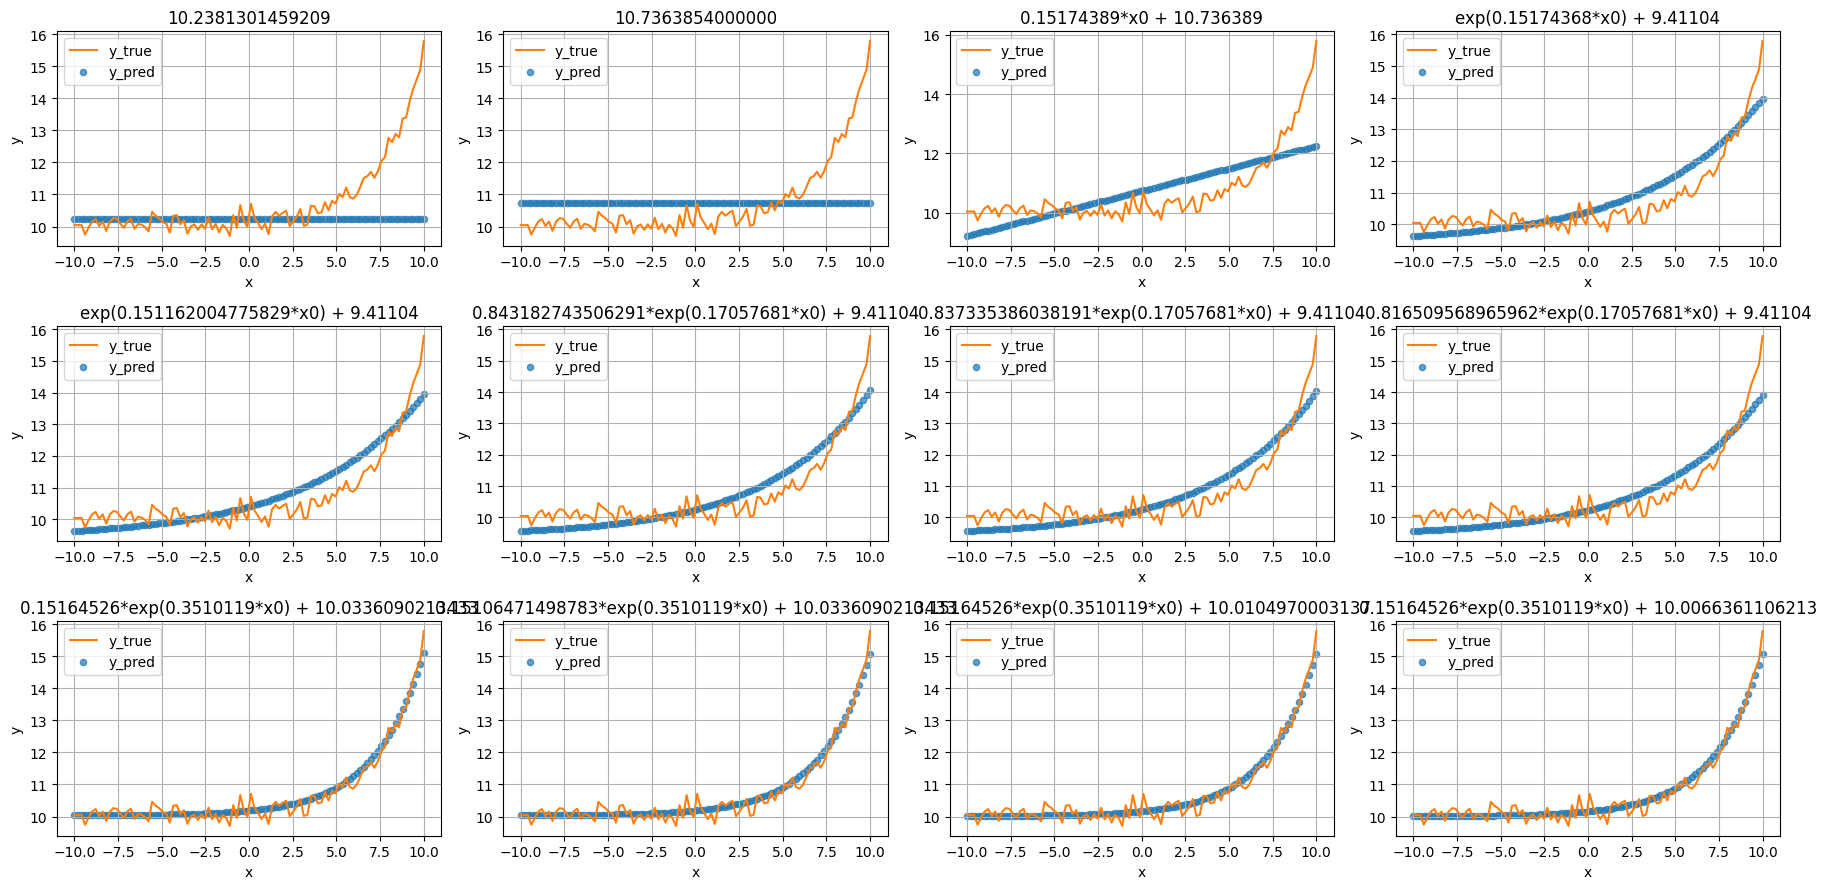

In [64]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18, 9))
for i in range(len(model.equations_["equation"])):
  ax = fig.add_subplot(3, 4, i+1)
  y_pred = model.predict(x, i)
  ax.plot(x, y_with_noise, label="y_true", color="tab:orange")
  ax.scatter(x, y_pred, label="y_pred", c="tab:blue", s=20, alpha=0.7)
  ax.legend()
  ax.set_xlabel("x")
  ax.set_ylabel("y")
  ax.grid(True)
  ax.set_title(model.equations_["sympy_format"][i])
plt.tight_layout()

In [62]:
"\n".join(model.equations_["equation"][10].split(" "))

'(exp(0.3510119\n*\nx0)\n*\n0.15164526)\n+\nexp(exp(sin(cos(inv(cos(-0.38687432))\n*\n-0.14831641))))'

In [58]:
model.equations_

,complexity,loss,score,equation,sympy_format,lambda_format
0,2,1.730270,0.000000,exp(2.326119),10.2381301459209,PySRFunction(X=>10.2381301459209)
1,3,1.482008,0.154880,11.889284 + -1.1528986,10.7363854000000,PySRFunction(X=>10.7363854000000)
2,5,0.698962,0.375778,(0.15174389 * x0) + 10.736389,0.15174389*x0 + 10.736389,PySRFunction(X=>0.15174389*x0 + 10.736389)
3,6,0.290300,0.878682,exp(0.15174368 * x0) + 9.41104,exp(0.15174368*x0) + 9.41104,PySRFunction(X=>exp(0.15174368*x0) + 9.41104)
4,7,0.289582,0.002476,9.41104 + exp(sin(0.15174368) * x0),exp(0.151162004775829*x0) + 9.41104,PySRFunction(X=>exp(0.151162004775829*x0) + 9....
5,9,0.240049,0.093798,exp(0.17057681 * (x0 + sin(-1.5629557))) + 9.4...,0.843182743506291*exp(0.17057681*x0) + 9.41104,PySRFunction(X=>0.843182743506291*exp(0.170576...
6,10,0.238581,0.006133,exp(0.17057681 * (x0 + (-1.5629557 + 0.5221894...,0.837335386038191*exp(0.17057681*x0) + 9.41104,PySRFunction(X=>0.837335386038191*exp(0.170576...
7,11,0.235879,0.011389,exp((x0 + inv(sin(sin(-1.5629557)))) * 0.17057...,0.816509568965962*exp(0.17057681*x0) + 9.41104,PySRFunction(X=>0.816509568965962*exp(0.170576...
8,12,0.049593,1.559464,exp(exp(sin(cos(-0.14831641)))) + (0.15164526 ...,0.15164526*exp(0.3510119*x0) + 10.0336090213433,PySRFunction(X=>0.15164526*exp(0.3510119*x0) +...
9,13,0.049546,0.000962,(exp(0.3510119 * x0) * sin(0.15164526)) + exp(...,0.15106471498783*exp(0.3510119*x0) + 10.033609...,PySRFunction(X=>0.15106471498783*exp(0.3510119...
